In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### 1 Einlesen der Clusterdaten

In [2]:
df_onehot = pd.read_csv('tweaked_datasets\slurm_dataset_onehot_clustered.csv', index_col=0)
slurm_onehot_input = df_onehot.drop("Cluster", axis=1)
slurm_onehot_target = df_onehot["Cluster"]

### 2 train_test_split der Daten

In [3]:
X_train, X_test, y_train, y_test = train_test_split(slurm_onehot_input, slurm_onehot_target, test_size=0.2, random_state=42)

### 3.1 DecisionTreeClassifier

##### 3.1.1 GridSearchCV für optimale Hyperparameter des DecisionTreeClassifier

Suche mit GridSearchCV die optimalen Hyperparameter für den DecisionTreeClassifier. mit den Standard-Hyperparametern ist der Classifier bereits gut, allerdings wird überprüft, ob wir Hyperparameter finden können, die die Komplexität des DecisionTrees senken können.

In [4]:
dtc = DecisionTreeClassifier()
param_grid = {"max_depth": [1,2,3,4,5,6,7,], "min_samples_split": [2,3,4,5], "min_samples_leaf": [1,2,3,4,5,6,7,8]}
gridsearch = GridSearchCV(estimator=dtc, param_grid=param_grid)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5]})

In [5]:
df_grid = pd.DataFrame(gridsearch.cv_results_)
df_grid[df_grid["mean_test_score"] > 0.99].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
64,1.217642,0.027711,0.099856,0.006278,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.990699,0.990609,0.990712,0.991057,0.990162,0.990648,0.000287,129
65,1.205434,0.036842,0.100945,0.003997,3,1,3,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.990699,0.990609,0.990712,0.991057,0.990162,0.990648,0.000287,129
66,1.222003,0.039718,0.101170,0.004257,3,1,4,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.990699,0.990609,0.990712,0.991057,0.990162,0.990648,0.000287,129
67,1.211597,0.018995,0.101472,0.004095,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.990699,0.990609,0.990712,0.991057,0.990162,0.990648,0.000287,129
68,1.221182,0.028223,0.102433,0.005987,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.990699,0.990609,0.990712,0.991057,0.990162,0.990648,0.000287,129


Hier scheinen die Hyperparameter: max_depth=3, min_samples_leaf=1 und min_samples_split=2, gut zu passen und eine sehr gute Accuracy zu erzielen.

##### 3.1.2 Fit des DecisionTreeClassifiers

In [6]:
dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

##### 3.1.3 Prediction & Accuracy des DecisionTreeClassifiers

In [7]:
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9461536886923769


##### 3.1.4 Plot des DecisionTreeClassifiers

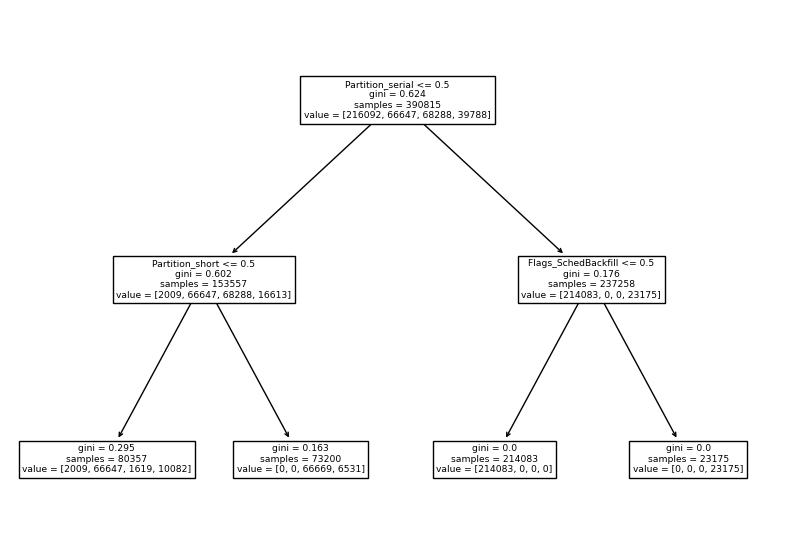

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
tree.plot_tree(dtc, ax=ax, feature_names=slurm_onehot_input.columns)
plt.show()

### 3.2 RandomForestClassifier

##### 3.2.1 RandomziedSearchCV zur Suche von optimalen Hyperparametern

Aufgrund von zu hoher Rechenzeit, kommt hier RandomizedSearchCV zum Einsatz.

In [9]:
rfc = RandomForestClassifier()
param_grid = {"n_estimators": [50,100,250,500], "max_depth": [1,2,3,4,5,6], "min_samples_leaf": [1,2,3,4,5], "min_samples_split": [2,3,4,5]}
randomizedsearch = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, random_state=42)
randomizedsearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 250, 500]},
                   random_state=42)

In [10]:
df_grid_rand = pd.DataFrame(randomizedsearch.cv_results_)
df_grid_rand

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.949410,0.181112,0.485413,0.014738,100,4,5,1,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.859934,0.856505,0.853767,0.855200,0.857976,0.856676,0.002143,9
1,53.072134,0.720834,1.452047,0.030858,250,5,1,6,"{'n_estimators': 250, 'min_samples_split': 5, ...",0.994857,0.994550,0.994831,0.994806,0.994806,0.994770,0.000112,2
2,49.157671,1.207608,1.401716,0.015415,250,4,5,5,"{'n_estimators': 250, 'min_samples_split': 4, ...",0.993821,0.993897,0.994204,0.993987,0.993782,0.993938,0.000150,4
3,17.727129,0.222121,0.585693,0.005973,100,3,3,4,"{'n_estimators': 100, 'min_samples_split': 3, ...",0.990725,0.990609,0.990712,0.991057,0.990162,0.990653,0.000288,7
4,98.202986,0.745179,2.700084,0.024904,500,5,5,5,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.994115,0.993961,0.993846,0.994307,0.993872,0.994020,0.000171,3
5,7.908843,0.154057,0.320713,0.010314,50,5,1,3,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.978379,0.957576,0.955606,0.991057,0.952612,0.967046,0.015059,8
6,9.082451,0.228877,0.342938,0.015168,50,5,2,4,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.992554,0.990635,0.990725,0.991403,0.991825,0.991428,0.000714,6
7,97.117015,0.696842,2.780746,0.019617,500,3,4,5,"{'n_estimators': 500, 'min_samples_split': 3, ...",0.994102,0.993897,0.993910,0.993987,0.993744,0.993928,0.000117,5
8,7.811793,0.109640,0.507417,0.009528,100,5,5,1,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.849814,0.860356,0.859281,0.803667,0.858859,0.846395,0.021697,10
9,52.822959,0.524765,1.527174,0.028422,250,4,3,6,"{'n_estimators': 250, 'min_samples_split': 4, ...",0.994921,0.994742,0.994857,0.995062,0.994396,0.994795,0.000225,1


Hier scheinen die Hyperparameter n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_depth=3 am Besten zu passen, da diese eine sehr guten Score versprechen und der Baum insbesondere nicht so tief wird, also die Komplexität des Baumes auch nicht so hoch ist. 

##### 3.2.2 Fit des RandomForestClassifiers mit optimalen Hyperparametern

In [11]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_split=5, min_samples_leaf=1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=50,
                       random_state=42)

##### 3.2.3 Prediction & Accuracy des RandomForestClassifiers auf den Testdaten

In [12]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9874109555391796


##### 3.2.4 Plot einer der Estimators des RandomForestClassifiers

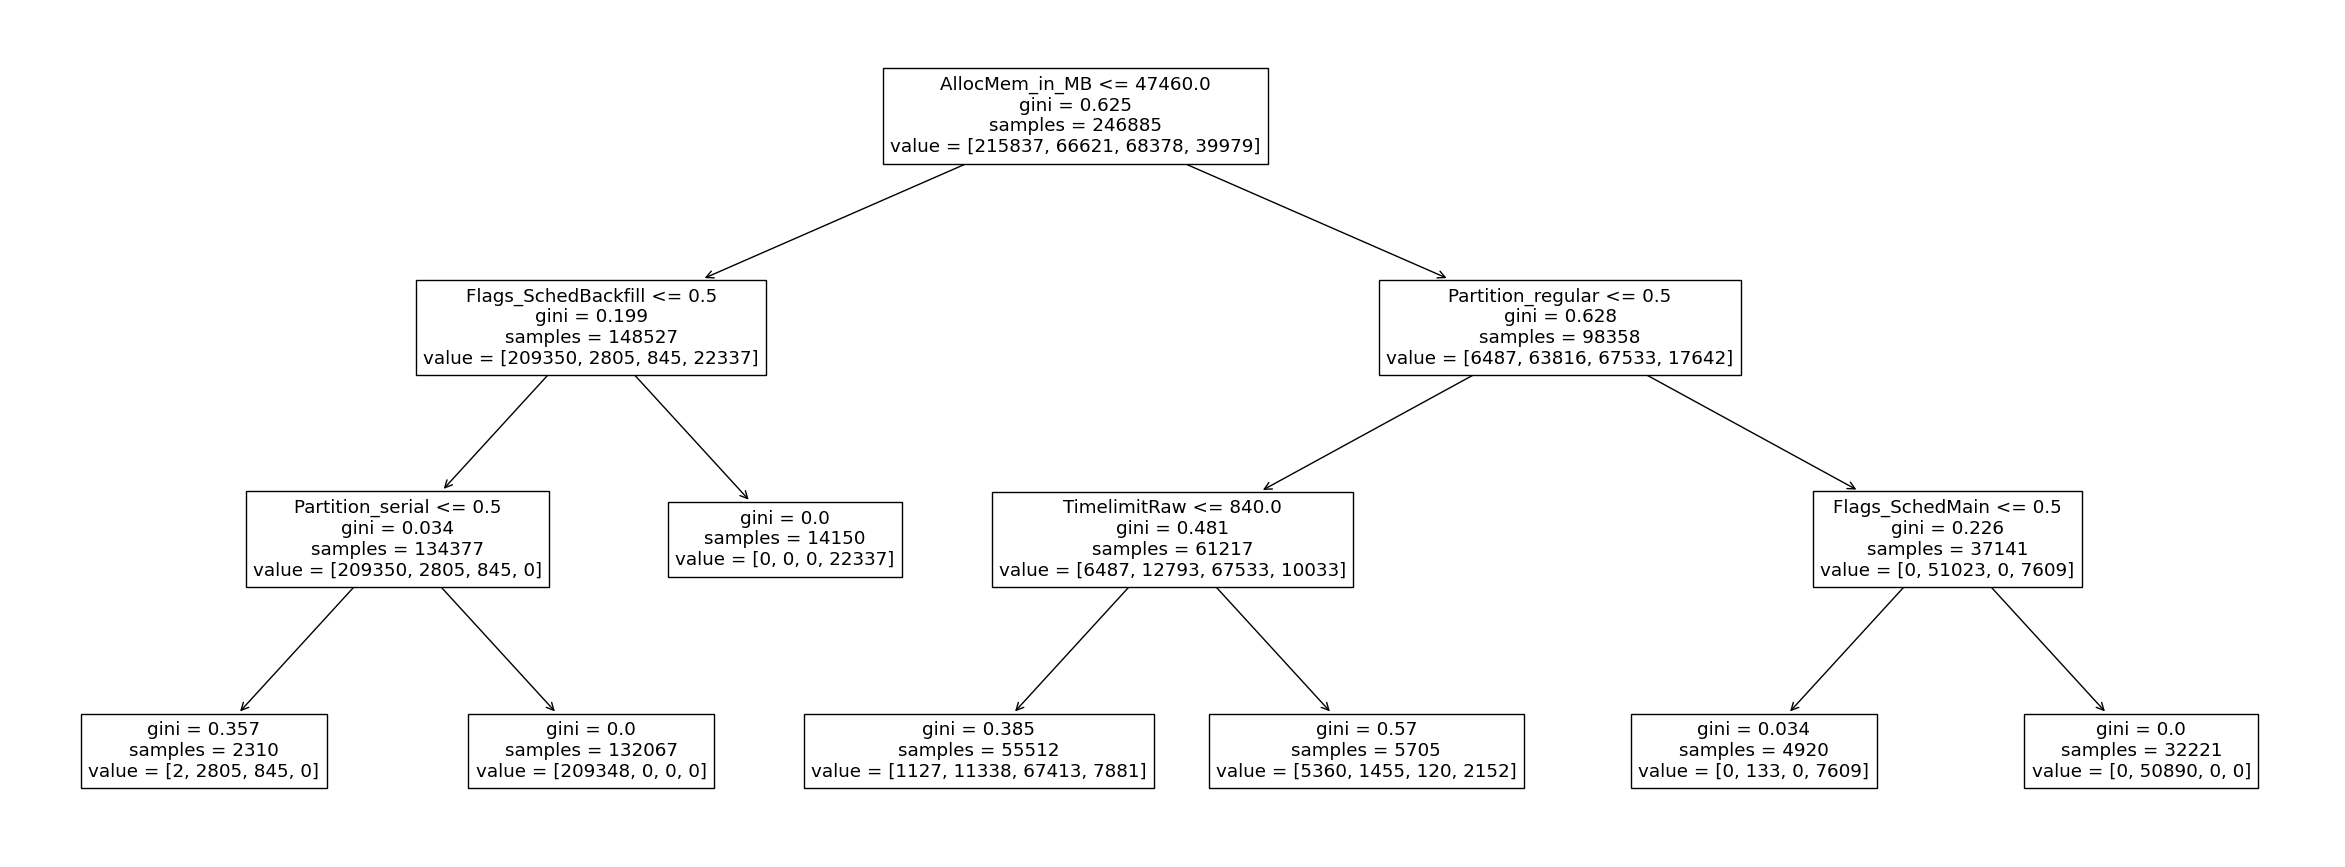

In [13]:
fig, ax = plt.subplots(figsize=(30,11))
tree.plot_tree(rfc.estimators_[0], ax=ax, feature_names=slurm_onehot_input.columns)
plt.show()

#### 4 Zusammenfassung & Vergleich

Hier kommen zwei Classifer zum Einsatz. Ein DecisionTreeClassifer & RandomForestClassifier. Zuerst wurde für beide Classifier nach optimalen Parametern untersucht, wobei wichtig zu erwähnen ist, dass für den DTC GridSearchCV und für den RandomForestClassifer RandomizedSearchCV zum Einsatz kam. Danach wurden die besten Hyperparameter ausgewählt. Hier wurde versucht, die Komplexität der Bäume gering zu halten, aber gleichzeitig eine gute Performance zu erzielen.
Die Bäume unterscheiden sich nur in min_samples_split, allerdings werden interessanterweise beim (1. Baum) des RFC und DTC die Daten an unterschiedlichen Features getrennt. Der Trainingsscore des DTC ist zu dem um 2 Prozentpunkte besser im Vergleich zum RFC.